In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [80]:
df = pd.read_excel("merc.xlsx")

In [81]:
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [82]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


<AxesSubplot:xlabel='price', ylabel='Count'>

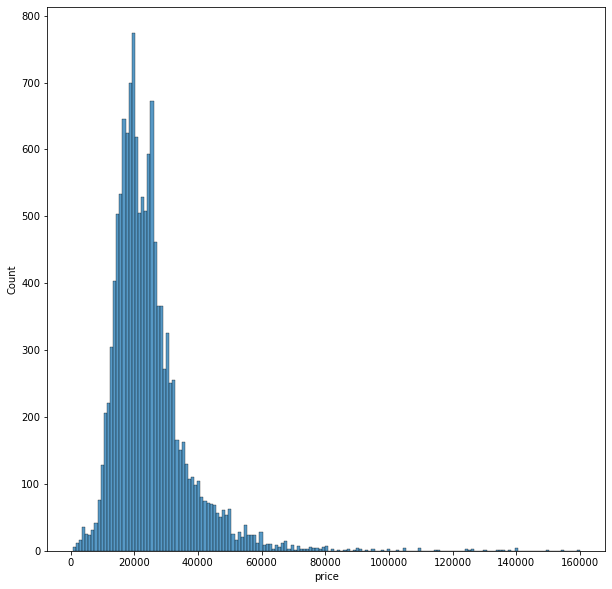

In [84]:
plt.figure(figsize=(10,10))
sns.histplot(df["price"])

### 80K £ sonrasında arabalar çok olmadığı için bu fiyatlar ortalamamızı etkiliyor. Daha doğru bir modelleme için dataframe'i azalan fiyata göre sıralayıp %1'lik kısmı attıktan sonra kalan %99'luk kısım ile modelleme yapmak daha iyi olacaktır.

In [85]:
YuzdeBir = len(df)*(0.01)
YuzdeBir

131.19

In [86]:
df.sort_values("price",ascending = False)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [87]:
#Bu sayede modeli etkileyecek ilk 131 tanesi gitmiş oldu
df = df.sort_values("price",ascending = False).iloc[131:]
df

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


### Dataframe'deki transmission column'u sayısal bir değer içermediği için modelimize dahil edemeyiz, bu column'u df üzerinden kaldırmamız gerekir.

In [88]:
currentDF = df.drop("transmission",axis = 1)
currentDF.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


### Veriyi test ve train olarak ikiye bölme

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
y = currentDF["price"].values
x = currentDF[["year","mileage","tax","mpg","engineSize"]].values

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 15)

In [92]:
print("len x_train:{}\nlen x_test:{}".format(len(x_train),len(x_test)))

len x_train:9091
len x_test:3897


### Veriyi uygun hale getirmek

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy = True, feature_range = (0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Modeli Oluşturma

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [95]:
model = Sequential()

### Katmanları Oluşturma

In [96]:
model.add(Dense(8,activation = "relu"))
model.add(Dense(8,activation = "relu"))
model.add(Dense(8,activation = "relu"))


model.add(Dense(1))

In [97]:
model.compile(optimizer = "rmsprop",loss = "mse")

### Modeli Eğitmek

In [98]:
model.fit(x_train,y_train,epochs = 250)

Epoch 1/250
285/285 [==============================] - 1s 1ms/step - loss: 673193792.0000
Epoch 2/250
285/285 [==============================] - 0s 2ms/step - loss: 670654336.0000
Epoch 3/250
285/285 [==============================] - 0s 2ms/step - loss: 659908608.0000
Epoch 4/250
285/285 [==============================] - 0s 2ms/step - loss: 631188992.0000
Epoch 5/250
285/285 [==============================] - 0s 2ms/step - loss: 572098560.0000
Epoch 6/250
285/285 [==============================] - 0s 1ms/step - loss: 472467328.0000
Epoch 7/250
285/285 [==============================] - 0s 2ms/step - loss: 334140320.0000
Epoch 8/250
285/285 [==============================] - 0s 1ms/step - loss: 187037312.0000
Epoch 9/250
285/285 [==============================] - 0s 2ms/step - loss: 101424576.0000
Epoch 10/250
285/285 [==============================] - 0s 1ms/step - loss: 92858840.0000
Epoch 11/250
285/285 [==============================] - 1s 2ms/step - loss: 91288192.0000
Epoch 12/2

285/285 [==============================] - 0s 1ms/step - loss: 24141442.0000
Epoch 93/250
285/285 [==============================] - 0s 1ms/step - loss: 24118122.0000
Epoch 94/250
285/285 [==============================] - 0s 1ms/step - loss: 24053022.0000
Epoch 95/250
285/285 [==============================] - 0s 2ms/step - loss: 23986400.0000
Epoch 96/250
285/285 [==============================] - 0s 1ms/step - loss: 23970628.0000
Epoch 97/250
285/285 [==============================] - 0s 1ms/step - loss: 23925042.0000
Epoch 98/250
285/285 [==============================] - 0s 1ms/step - loss: 23905600.0000
Epoch 99/250
285/285 [==============================] - 0s 1ms/step - loss: 23866260.0000
Epoch 100/250
285/285 [==============================] - 0s 1ms/step - loss: 23833056.0000
Epoch 101/250
285/285 [==============================] - 0s 1ms/step - loss: 23802930.0000
Epoch 102/250
285/285 [==============================] - 0s 1ms/step - loss: 23770632.0000
Epoch 103/250
285/28

285/285 [==============================] - 0s 2ms/step - loss: 22368894.0000
Epoch 183/250
285/285 [==============================] - 1s 2ms/step - loss: 22361776.0000
Epoch 184/250
285/285 [==============================] - 0s 2ms/step - loss: 22351920.0000
Epoch 185/250
285/285 [==============================] - 0s 2ms/step - loss: 22324820.0000
Epoch 186/250
285/285 [==============================] - 0s 2ms/step - loss: 22323592.0000
Epoch 187/250
285/285 [==============================] - 0s 2ms/step - loss: 22299594.0000
Epoch 188/250
285/285 [==============================] - 0s 2ms/step - loss: 22301874.0000
Epoch 189/250
285/285 [==============================] - 0s 2ms/step - loss: 22254822.0000
Epoch 190/250
285/285 [==============================] - 0s 2ms/step - loss: 22245230.0000
Epoch 191/250
285/285 [==============================] - 0s 1ms/step - loss: 22272262.0000
Epoch 192/250
285/285 [==============================] - 0s 2ms/step - loss: 22257956.0000
Epoch 193/250

In [99]:
loss = model.history.history["loss"]

<AxesSubplot:>

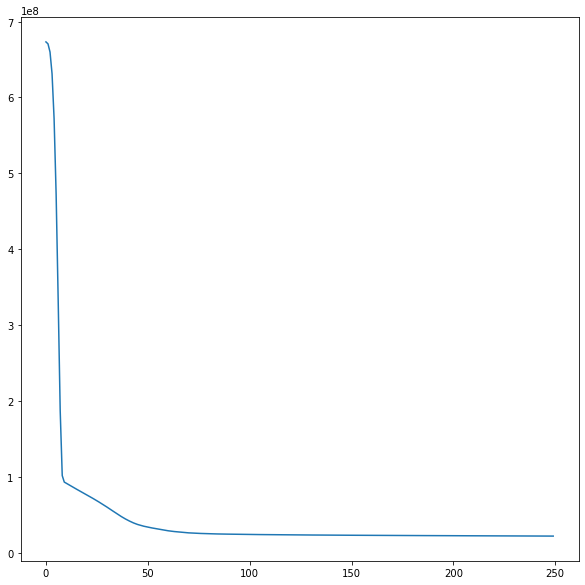

In [100]:
plt.figure(figsize = (10,10))
sns.lineplot(x=range(len(loss)),y = loss)

In [101]:
trainloss = model.evaluate(x_train,y_train)

285/285 [==============================] - 0s 1ms/step - loss: 21610994.0000


In [102]:
testloss = model.evaluate(x_test,y_test)

122/122 [==============================] - 0s 1ms/step - loss: 28723640.0000


### Test verileri ile tahmin

In [103]:
testTahminleri = model.predict(x_test)
len(testTahminleri)

3897

In [104]:
testTahminleri = testTahminleri.reshape(3897,)

### Sonuçları Karşılaştırmak

In [105]:
karsılastırmaDF = pd.DataFrame(y_test,columns = ["Gerçek Degerler"])

In [106]:
karsılastırmaDF.head()

,Gerçek Degerler
0,13485
1,53000
2,21495
3,31199
4,24724


In [107]:
testTahminleri = pd.Series(testTahminleri)
karsılastırmaDF = pd.concat([karsılastırmaDF,testTahminleri],axis = 1)
karsılastırmaDF

,Gerçek Degerler,0
0,13485,9056.046875
1,53000,41863.941406
2,21495,19118.460938
3,31199,31193.664062
4,24724,22338.708984
...,...,...
3892,19980,12583.406250
3893,11998,9485.047852
3894,31276,29744.378906
3895,28990,26470.470703


In [108]:
karsılastırmaDF.columns = ["Gercek Y","Tahmin Y"]

<AxesSubplot:xlabel='Gercek Y', ylabel='Tahmin Y'>

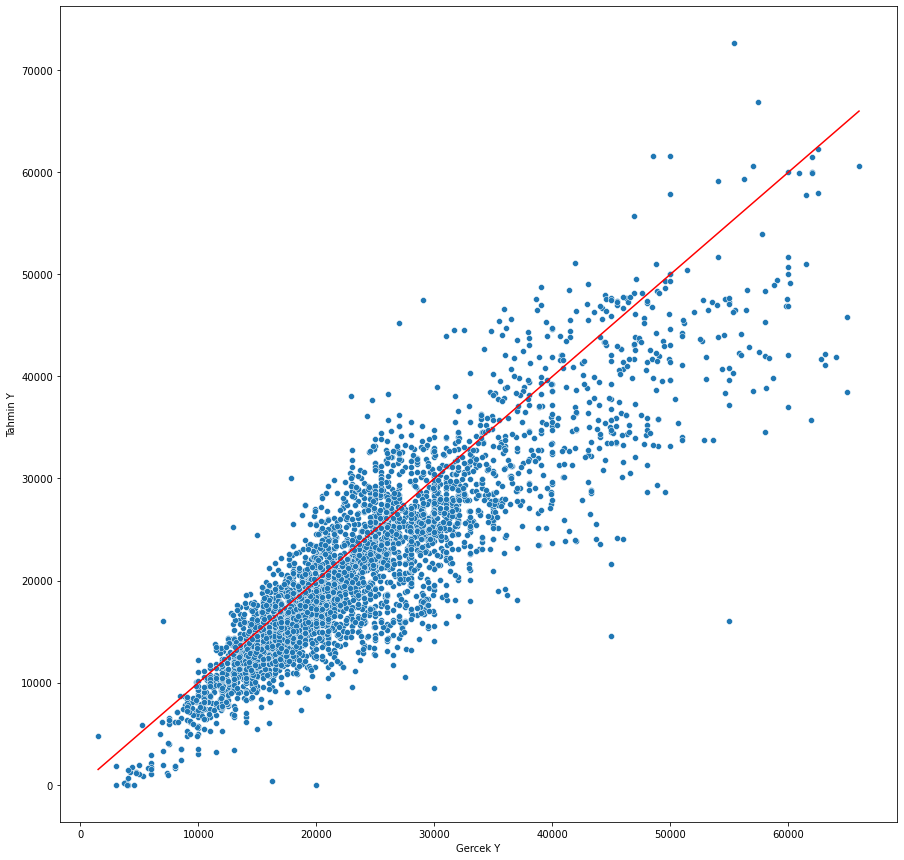

In [109]:
plt.figure(figsize = (15,15))
sns.scatterplot(x = "Gercek Y",y = "Tahmin Y",data = karsılastırmaDF)
sns.lineplot(x = "Gercek Y", y = "Gercek Y",data = karsılastırmaDF,color = "red")

### Kayıt

In [118]:
model.save("Mercedes_modeli.h5")

# Test-1

In [130]:
#"year","mileage","tax","mpg","engineSize"
test = [[2018,670,249,61,2.1]]
test = scaler.transform(test)

In [131]:
model.predict(test)

array([[-0.77757233]], dtype=float32)

# Test Başarısız